# Exploratory data analysis on tiktok experiment???

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)


In [3]:
# Read MSM.csv

df = pd.read_csv(r"C:\Users\berny\Documents\tiktok\5.1 IAD TikTok-1\MSM.csv", delimiter=',', skiprows=10)
df.head()


,Study Name,Respondent Name,Gender,Age,Group,Type,Label,Start (ms),Duration (ms),Parent Stimulus,Comment,Blink Count,Blink Rate,Interblink Interval,Count Frames,Anger Threshold,Anger Frames >= Threshold,Anger Time Percentage,Contempt Threshold,Contempt Frames >= Threshold,Contempt Time Percentage,Disgust Threshold,Disgust Frames >= Threshold,Disgust Time Percentage,Fear Threshold,Fear Frames >= Threshold,Fear Time Percentage,Joy Threshold,Joy Frames >= Threshold,Joy Time Percentage,Sadness Threshold,Sadness Frames >= Threshold,Sadness Time Percentage,Surprise Threshold,Surprise Frames >= Threshold,Surprise Time Percentage,Engagement Threshold,Engagement Frames >= Threshold,Engagement Time Percentage,Adaptive Engagement Threshold,Adaptive Engagement Frames >= Threshold,Adaptive Engagement Time Percentage,Positive Valence Threshold,Positive Valence Frames >= Threshold,Positive Valence Time Percentage,Negative Valence Threshold,Negative Valence Frames < Threshold,Negative Valence Time Percentage,Neutral Valence Threshold,Neutral Valence Frames Between Threshold,Neutral Valence Time Percentage,Positive Adaptive Valence Threshold,Positive Adaptive Valence Frames >= Threshold,Positive Adaptive Valence Time Percentage,Negative Adaptive Valence Threshold,Negative Adaptive Valence Frames >= Threshold,Negative Adaptive Valence Time Percentage,Neutral Adaptive Valence Threshold,Neutral Adaptive Valence Frames Between Threshold,Neutral Adaptive Valence Time Percentage,Sentimentality Threshold,Sentimentality Frames >= Threshold,Sentimentality Time Percentage,Confusion Threshold,Confusion Frames >= Threshold,Confusion Time Percentage,Neutral Threshold,Neutral Frames >= Threshold,Neutral Time Percentage,Attention Threshold,Attention Frames >= Threshold,Attention Time Percentage,Brow Furrow Threshold,Brow Furrow Frames >= Threshold,Brow Furrow Time Percentage,Brow Raise Threshold,Brow Raise Frames >= Threshold,Brow Raise Time Percentage,Cheek Raise Threshold,Cheek Raise Frames >= Threshold,Cheek Raise Time Percentage,Chin Raise Threshold,Chin Raise Frames >= Threshold,Chin Raise Time Percentage,Dimpler Threshold,Dimpler Frames >= Threshold,Dimpler Time Percentage,Eye Closure Threshold,Eye Closure Frames >= Threshold,Eye Closure Time Percentage,Eye Widen Threshold,Eye Widen Frames >= Threshold,Eye Widen Time Percentage,Inner Brow Raise Threshold,Inner Brow Raise Frames >= Threshold,Inner Brow Raise Time Percentage,Jaw Drop Threshold,Jaw Drop Frames >= Threshold,Jaw Drop Time Percentage,Lip Corner Depressor Threshold,Lip Corner Depressor Frames >= Threshold,Lip Corner Depressor Time Percentage,Lip Press Threshold,Lip Press Frames >= Threshold,Lip Press Time Percentage,Lip Pucker Threshold,Lip Pucker Frames >= Threshold,Lip Pucker Time Percentage,Lip Stretch Threshold,Lip Stretch Frames >= Threshold,Lip Stretch Time Percentage,Lip Suck Threshold,Lip Suck Frames >= Threshold,Lip Suck Time Percentage,Lid Tighten Threshold,Lid Tighten Frames >= Threshold,Lid Tighten Time Percentage,Mouth Open Threshold,Mouth Open Frames >= Threshold,Mouth Open Time Percentage,Nose Wrinkle Threshold,Nose Wrinkle Frames >= Threshold,Nose Wrinkle Time Percentage,Smile Threshold,Smile Frames >= Threshold,Smile Time Percentage,Smirk Threshold,Smirk Frames >= Threshold,Smirk Time Percentage,Upper Lip Raise Threshold,Upper Lip Raise Frames >= Threshold,Upper Lip Raise Time Percentage,Speaking Threshold,Speaking Frames >= Threshold,Speaking Time Percentage,Head Pointing Up Threshold,Head Pointing Up Frames >= Threshold,Head Pointing Up Time Percentage,Head Pointing Down Threshold,Head Pointing Down Frames < Threshold,Head Pointing Down Time Percentage,Head Pointing Forward Threshold,Head Pointing Forward Frames Between Threshold,Head Pointing Forward Time Percentage,Head Turned Right Threshold,Head Turned Right Frames >= Threshold,Head Turned Right Time Percentage,Head Turned Left Threshold,Head Turned Left Frames < Threshold,Head Turned Left Time Percentage,Head Turned Fo

1. Percentage of missing values

<Axes: >

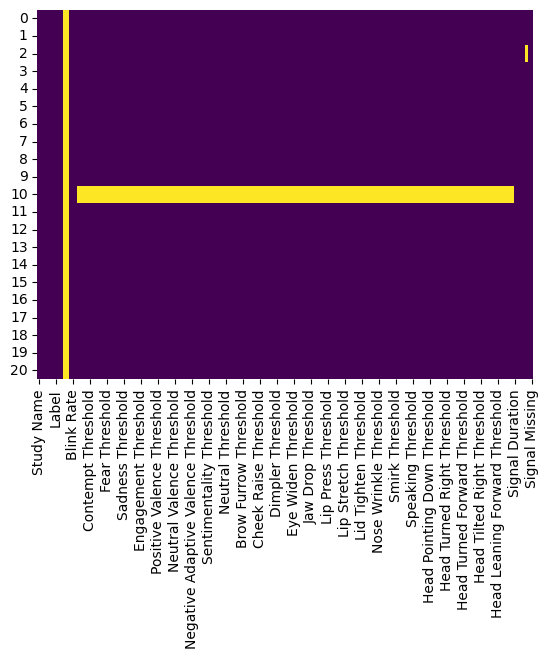

In [4]:
sns.heatmap(df.isnull(), yticklabels=True, cbar=False, cmap='viridis')

Since we are working with many features, is best for us to calculate the percentage of missing values directly

In [5]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

Parent Stimulus 1.0 % missing values
Comment 1.0 % missing values
Count Frames 0.0476 % missing values
Anger Threshold 0.0476 % missing values
Anger Frames >= Threshold 0.0476 % missing values
Anger Time Percentage 0.0476 % missing values
Contempt Threshold 0.0476 % missing values
Contempt Frames >= Threshold 0.0476 % missing values
Contempt Time Percentage 0.0476 % missing values
Disgust Threshold 0.0476 % missing values
Disgust Frames >= Threshold 0.0476 % missing values
Disgust Time Percentage 0.0476 % missing values
Fear Threshold 0.0476 % missing values
Fear Frames >= Threshold 0.0476 % missing values
Fear Time Percentage 0.0476 % missing values
Joy Threshold 0.0476 % missing values
Joy Frames >= Threshold 0.0476 % missing values
Joy Time Percentage 0.0476 % missing values
Sadness Threshold 0.0476 % missing values
Sadness Frames >= Threshold 0.0476 % missing values
Sadness Time Percentage 0.0476 % missing values
Surprise Threshold 0.0476 % missing values
Surprise Frames >= Thresho

After a short analysis I am able to see there is a constant 4.76% of missing values in each feature, probably this is because of miscalibrated equipment with a subject.

After analyzing with Data Wrangler and also the heatmap, precisely subject 10 has all features missing, as a first thought we can impute features on subject based on median or mean but for now let us go ahead and drop the subject.

In [6]:
df.drop(index=10, inplace=True)

Now let us calculate percentage of missing values again

In [7]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

Parent Stimulus 1.0 % missing values
Comment 1.0 % missing values
Average Peak Amplitude 0.05 % missing values


Since `Parent Stimulus` and `Comment` features are missing on all features let us go ahead and drop them 

In [8]:
df.drop(columns=['Parent Stimulus', 'Comment'], inplace=True)

In [9]:
df


,Study Name,Respondent Name,Gender,Age,Group,Type,Label,Start (ms),Duration (ms),Blink Count,Blink Rate,Interblink Interval,Count Frames,Anger Threshold,Anger Frames >= Threshold,Anger Time Percentage,Contempt Threshold,Contempt Frames >= Threshold,Contempt Time Percentage,Disgust Threshold,Disgust Frames >= Threshold,Disgust Time Percentage,Fear Threshold,Fear Frames >= Threshold,Fear Time Percentage,Joy Threshold,Joy Frames >= Threshold,Joy Time Percentage,Sadness Threshold,Sadness Frames >= Threshold,Sadness Time Percentage,Surprise Threshold,Surprise Frames >= Threshold,Surprise Time Percentage,Engagement Threshold,Engagement Frames >= Threshold,Engagement Time Percentage,Adaptive Engagement Threshold,Adaptive Engagement Frames >= Threshold,Adaptive Engagement Time Percentage,Positive Valence Threshold,Positive Valence Frames >= Threshold,Positive Valence Time Percentage,Negative Valence Threshold,Negative Valence Frames < Threshold,Negative Valence Time Percentage,Neutral Valence Threshold,Neutral Valence Frames Between Threshold,Neutral Valence Time Percentage,Positive Adaptive Valence Threshold,Positive Adaptive Valence Frames >= Threshold,Positive Adaptive Valence Time Percentage,Negative Adaptive Valence Threshold,Negative Adaptive Valence Frames >= Threshold,Negative Adaptive Valence Time Percentage,Neutral Adaptive Valence Threshold,Neutral Adaptive Valence Frames Between Threshold,Neutral Adaptive Valence Time Percentage,Sentimentality Threshold,Sentimentality Frames >= Threshold,Sentimentality Time Percentage,Confusion Threshold,Confusion Frames >= Threshold,Confusion Time Percentage,Neutral Threshold,Neutral Frames >= Threshold,Neutral Time Percentage,Attention Threshold,Attention Frames >= Threshold,Attention Time Percentage,Brow Furrow Threshold,Brow Furrow Frames >= Threshold,Brow Furrow Time Percentage,Brow Raise Threshold,Brow Raise Frames >= Threshold,Brow Raise Time Percentage,Cheek Raise Threshold,Cheek Raise Frames >= Threshold,Cheek Raise Time Percentage,Chin Raise Threshold,Chin Raise Frames >= Threshold,Chin Raise Time Percentage,Dimpler Threshold,Dimpler Frames >= Threshold,Dimpler Time Percentage,Eye Closure Threshold,Eye Closure Frames >= Threshold,Eye Closure Time Percentage,Eye Widen Threshold,Eye Widen Frames >= Threshold,Eye Widen Time Percentage,Inner Brow Raise Threshold,Inner Brow Raise Frames >= Threshold,Inner Brow Raise Time Percentage,Jaw Drop Threshold,Jaw Drop Frames >= Threshold,Jaw Drop Time Percentage,Lip Corner Depressor Threshold,Lip Corner Depressor Frames >= Threshold,Lip Corner Depressor Time Percentage,Lip Press Threshold,Lip Press Frames >= Threshold,Lip Press Time Percentage,Lip Pucker Threshold,Lip Pucker Frames >= Threshold,Lip Pucker Time Percentage,Lip Stretch Threshold,Lip Stretch Frames >= Threshold,Lip Stretch Time Percentage,Lip Suck Threshold,Lip Suck Frames >= Threshold,Lip Suck Time Percentage,Lid Tighten Threshold,Lid Tighten Frames >= Threshold,Lid Tighten Time Percentage,Mouth Open Threshold,Mouth Open Frames >= Threshold,Mouth Open Time Percentage,Nose Wrinkle Threshold,Nose Wrinkle Frames >= Threshold,Nose Wrinkle Time Percentage,Smile Threshold,Smile Frames >= Threshold,Smile Time Percentage,Smirk Threshold,Smirk Frames >= Threshold,Smirk Time Percentage,Upper Lip Raise Threshold,Upper Lip Raise Frames >= Threshold,Upper Lip Raise Time Percentage,Speaking Threshold,Speaking Frames >= Threshold,Speaking Time Percentage,Head Pointing Up Threshold,Head Pointing Up Frames >= Threshold,Head Pointing Up Time Percentage,Head Pointing Down Threshold,Head Pointing Down Frames < Threshold,Head Pointing Down Time Percentage,Head Pointing Forward Threshold,Head Pointing Forward Frames Between Threshold,Head Pointing Forward Time Percentage,Head Turned Right Threshold,Head Turned Right Frames >= Threshold,Head Turned Right Time Percentage,Head Turned Left Threshold,Head Turned Left Frames < Threshold,Head Turned Left Time Percentage,Head Turned Forward Threshold,Head Tur

In [10]:
sensor_data = pd.read_csv(r"C:\Users\berny\Documents\tiktok\5.1 IAD TikTok-1\Sensor Data\021_Fernanda Grana.csv", skiprows=31)
sensor_data

C:\Users\berny\AppData\Local\Temp\ipykernel_28452\2733211876.py:1: DtypeWarning: Columns (3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  sensor_data = pd.read_csv(r"C:\Users\berny\Documents\tiktok\5.1 IAD TikTok-1\Sensor Data\021_Fernanda Grana.csv", skiprows=31)


,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,SampleNumber,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Adaptive Engagement,Valence,Adaptive Valence,Sentimentality,Confusion,Neutral,Attention,Brow Furrow,Brow Raise,Cheek Raise,Chin Raise,Dimpler,Eye Closure,Eye Widen,Inner Brow Raise,Jaw Drop,Lip Corner Depressor,Lip Press,Lip Pucker,Lip Stretch,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Speaking,Pitch,Yaw,Roll,Interocular Distance,EventSource.2,SampleNumber.1,width,height,feature id_1,feature-x_1,feature-y_1,feature id_2,feature-x_2,feature-y_2,feature id_3,feature-x_3,feature-y_3,feature id_4,feature-x_4,feature-y_4,feature id_5,feature-x_5,feature-y_5,feature id_6,feature-x_6,feature-y_6,EventSource.3,CPU Sys,Memory Sys,CPU Proc,Memory Proc,EventSource.4,Anger.1,Contempt.1,Disgust.1,Fear.1,Joy.1,Sadness.1,Surprise.1,Engagement.1,Adaptive Engagement.1,Positive Valence,Negative Valence,Neutral Valence,Positive Adaptive Valence,Negative Adaptive Valence,Neutral Adaptive Valence,Sentimentality.1,Confusion.1,Neutral.1,Attention.1,Brow Furrow.1,Brow Raise.1,Cheek Raise.1,Chin Raise.1,Dimpler.1,Eye Closure.1,Eye Widen.1,Inner Brow Raise.1,Jaw Drop.1,Lip Corner Depressor.1,Lip Press.1,Lip Pucker.1,Lip Stretch.1,Lip Suck.1,Lid Tighten.1,Mouth Open.1,Nose Wrinkle.1,Smile.1,Smirk.1,Upper Lip Raise.1,Speaking.1,Head Pointing Up,Head Pointing Down,Head Pointing Forward,Head Turned Right,Head Turned Left,Head Turned Forward,Head Tilted Left,Head Tilted Right,Head Not Tilted,Head Leaning Forward,Head Leaning Backward,EventSource.5,GSR Raw,GSR Interpolated,Tonic Signal,Phasic Signal,Peak Detected,Peak Amplitude,Peak Occurrences,Signal Interpolation,EventSource.6,SampleNumber.2,Timestamp RAW,Timestamp CAL,System Timestamp CAL,Wide Range Accelerometer X RAW,Wide Range Accelerometer X CAL,Wide Range Accelerometer Y RAW,Wide Range Accelerometer Y CAL,Wide Range Accelerometer Z RAW,Wide Range Accelerometer Z CAL,VSenseBatt RAW,VSenseBatt CAL,Internal ADC A13 PPG RAW,Internal ADC A13 PPG CAL,GSR RAW,GSR Resistance CAL,GSR Conductance CAL,Heart Rate PPG ALG,IBI PPG ALG,Packet reception rate RAW
0,1,27.8402,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,Screen recording 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,30.0111,NaN,NaN,NaN,NaN,NaN,Screen recording 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.223443,2.223443,2.223443,0.000000,0.0,0.0,0.0,0.0,1.0,641753.0,16058846.0,5.013695e+06,1.747087e+12,-2124.0,4.243567,7091.0,1.271095,-15844.0,9.481747,2563.0,3732.779487,2138.0,1566.300366,34968.0,449.752883,2.223443,-1.0,-1.0,99.0
2,3,37.8236,NaN,NaN,NaN,NaN,NaN,Screen recording 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N